<a href="https://colab.research.google.com/github/Mubassir1820/PyTorch-fundamentals/blob/main/_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch workflow

Let's ezplore an example of pyTorch end-to-end workflow

Resources:
* Ground truth notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book version - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {1: 'data (prepare and load)',
                      2: 'build model',
                      3: 'fitting the model to data (training)',
                      4: 'making predictions and evaluating a model (inference)',
                      5: 'saving and loading a model',
                      6: 'putting it all together'
                      }
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of pyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pyTorch version
torch.__version__

'2.0.1+cu118'

## Data (preparing and loading)

Data can be almost anything in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical presentation
2. Build a model to learn pattern in that numerical representation

To showcase this, let's create some known *known* data using the linear regression formula.

we will use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting the data into training and testing(one of the most important concenpts of machine learning)

Let's crete a training and test set with our data



In [4]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we visualie our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [5]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  '''
  Plots training data, test data and compares predictions.

  '''
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing data')

  # Are the predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', label = 'Predictions')

 # Show the legend
  plt.legend(prop = {'size': 14});

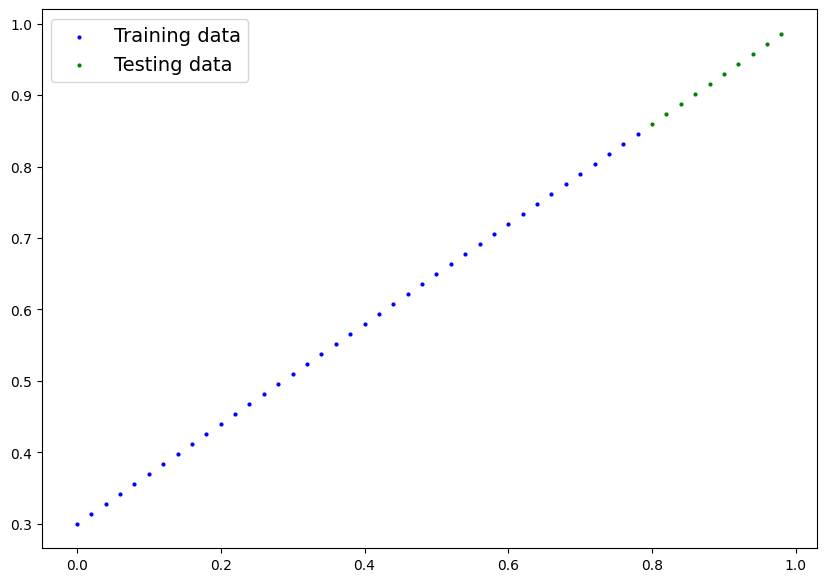

In [6]:
plot_predictions()

## Build model

Our first PyTorch model!

This is very exciting... Let's do it!

Waht our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create a data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagation

In [7]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module):   # almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad = True,
                                        dtype = torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'X' is the input data
    return self.weights * x + self.bias # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs ( a neural network can be considered a computational graph)
* torch.nn.Parameter - What parameters should our model try and learn, often a pyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyToch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, lets see whats inside....

So we can check our model parameters or whats inside our model using .parameters()

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model(subclass of nn.module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using 'torch.inference_model()'

To check our model's predictive power, let's see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, its going to run it through the 'forward()' method

In [10]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

# You can do something similar with torch.no_grad(), however torch.inference_mode() is prefered

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

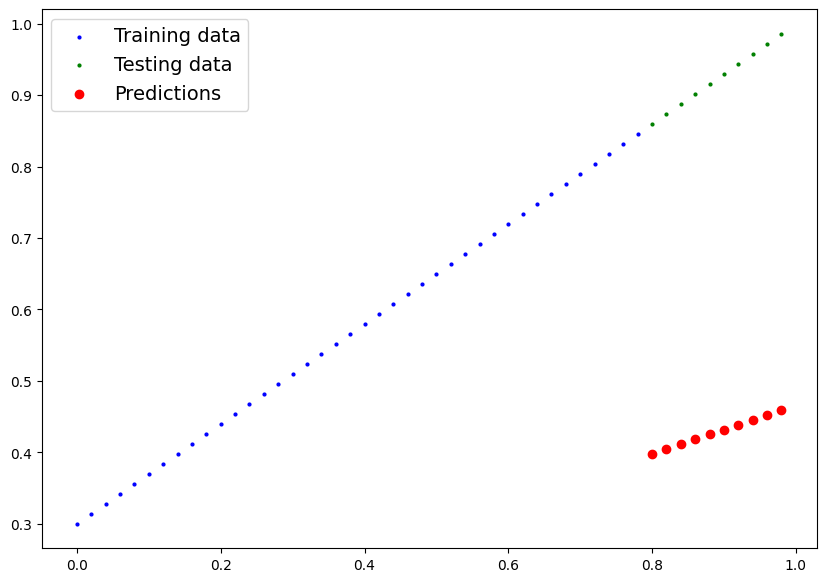

In [12]:
plot_predictions(predictions = y_preds)

### Train model

The whole idea of training for a model to move from some *unknown* parameters(this may be random) to some *known* parameter.

Or in other words from a poor representation of the data to a better representation of the data

One way to measure how poor or how wrong your model predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to refer it as a loss function

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predicitions are to the ideal input, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight and bias) to improve the lost function.

And specifically for pyTorch, we need:

  * A training loop
  * A testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# Check out our model's parameters(a parameter is a value that the model sets itself )
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# setup a loss function

loss_fn = nn.L1Loss()

# setup an optimizer(stochastic gradient descent)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #lr = learning rate = possibly the most important hypermeter you can set

### Building a training loop(and a testing loop) in pyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass(This involves data moving through our model's `forward()` functions) to make predicitons on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizzer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(** backpropagation**)
5. Optimizer step - Use the optimizer to adjust our model's parameters to try and improve the loss(** gradient descent **)


In [16]:
torch.manual_seed(42)

# An epoch is one loop throgh the data(This is a hyperparameter because we set this ourself)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in pyTorch sets all parameters that require gradients to requiire gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameter of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by deafault how optimizer chages will accumulate through the loop.. so we have to zero them above in step 3 for the next iteration of the loop





  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/tesing(dropouts, batchnorms)
  with torch.inference_mode(): # turns off gradient tracking and couple more things behind the scenes, you might see torch.no_grad() in older pytorch codes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)


  # Print out whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}')
    # Print out model state_dict()
    print(model_0.state_dict())




Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

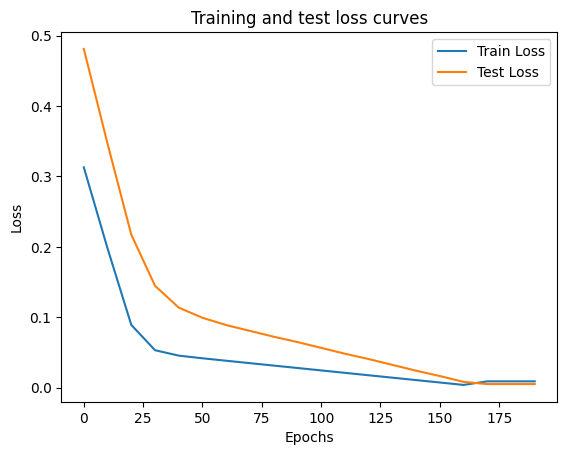

In [17]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [18]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [20]:
weight, bias

(0.7, 0.3)

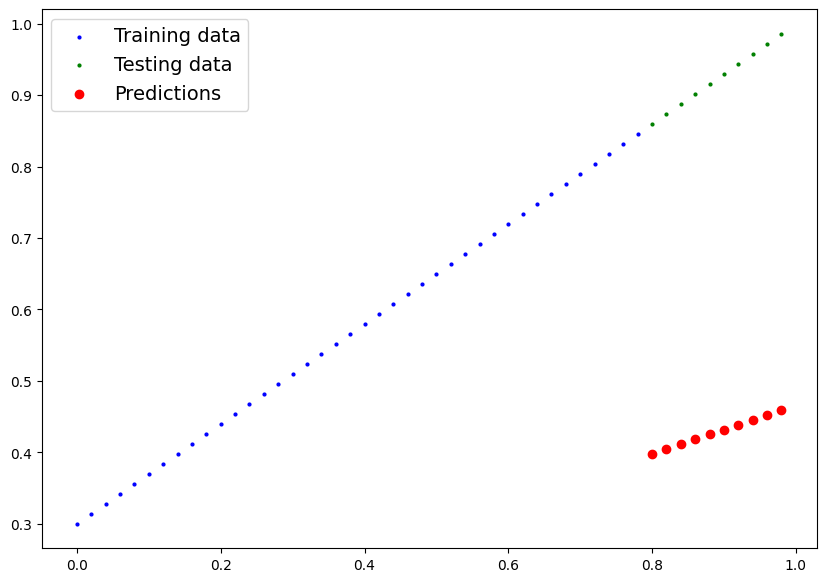

In [21]:
plot_predictions(predictions = y_preds)

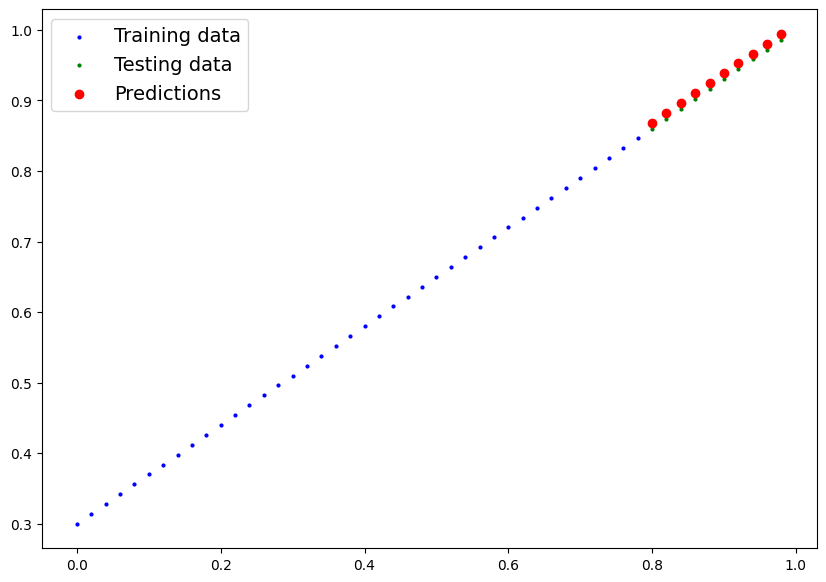

In [22]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyToch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [23]:
# saving our pytorch model

from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [24]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Jun 19 08:08 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than our entire model, we will create a new instance of our model class and load the saved state_dict() into that

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [27]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [28]:
# Make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [29]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [30]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [31]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.

This means if we have got access to a GPU, our code will use it(for potentially faster computing).If no GPU is available, the code will default to using CPU.

In [32]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


In [33]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


### 6.1 Data